In [ ]:
"""
Id	客戶 ID（唯一識別碼）
Home Ownership	房屋持有狀況（Own Home: 自有房產, Rent: 租房, Home Mortgage: 房貸）
Annual Income	年收入（申請人的年度收入）
Years in current job	目前工作的年數（如 10+ years, 5 years, <1 year，需轉換為數值）
Tax Liens	稅務留置權數量（是否因未繳稅款被政府扣押資產）
Number of Open Accounts	開啟的信貸帳戶數量（目前持有的信用卡、貸款數）
Years of Credit History	信用歷史年數（客戶擁有信貸紀錄的總年數）
Maximum Open Credit	最高可用信貸額度（過去曾獲得的最大信貸額度）
Number of Credit Problems	信用問題數量（如遲繳、違約等信用問題的總數）
Months since last delinquent	距離上次違約的月數（若為 0，代表未違約）
Bankruptcies	破產次數（申請人過去申請破產的次數）
Purpose	貸款用途（如 debt con: 債務整合, home im: 房屋裝修, other: 其他）
Term	貸款期限（Short: 短期貸款, Long: 長期貸款）
Current Loan Amount	目前貸款金額（客戶當前貸款的總金額）
Current Credit Balance	當前信用卡/貸款餘額（未償還的信貸餘額）
Monthly Debt	每月負債（申請人每月的貸款或信用卡還款額）
Credit Score	信用評分（數值型變數，影響違約風險）
Credit Default	是否違約（0=未違約，1=違約）（目標變數，分類問題）
"""
# DTI 負載比率

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/train.csv")
df = pd.DataFrame(data)

In [16]:
# Annual Income 探勘部分
# 缺失 1557 (20.76%) 算是缺失高，且收入是重要的值 !!
# 缺失 1557 (20.76%) Credit Score 相同，所以可能是 系統性缺失（Not Missing At Random, NMAR），因為沒收入是算不出評分的。
# 驗證1:
# 我想要先算出 Annual Income 缺失部分，是否 Credit Score欄位也是缺失
for i in range(7500):
    if bool(df["Annual Income"][i]) !=  bool(df["Credit Score"][i]):
        print("第"+ str(i) + "個的bool不同")
    else:
        pass
print("全部都對應")
# 證明是系統性

全部都對應


In [22]:
# 驗證2：檢查 Annual Income 缺失時，Credit Default 是否為 0
missing_income_default = df[df["Annual Income"].isna()]["Credit Default"]

# 檢查所有缺失 Annual Income 的行是否 Credit Default 皆為 0
if (missing_income_default == 0).all():
    print("全部缺失收入的樣本皆無違約")
else:
    print("發現有違約的樣本數：", (missing_income_default == 1).sum())
# 證明非系統性

發現有違約的樣本數： 529


In [ ]:
# 先不補值，繼續觀察其他欄位

In [31]:
# 以中位數填補 Annual Income
df["Annual Income"] = df["Annual Income"].fillna(df["Annual Income"].median())

In [67]:
# 計算 DTI
df["DTI"] = (df["Monthly Debt"] * 12) / df["Annual Income"]

# 檢查數據
print(df[["DTI", "Credit Default"]].describe())


               DTI  Credit Default
count  6630.000000     6630.000000
mean      0.177035        0.318703
std       0.092201        0.466009
min       0.000000        0.000000
25%       0.111998        0.000000
50%       0.168999        0.000000
75%       0.231573        1.000000
max       0.987793        1.000000


C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\682448914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DTI"] = (df["Monthly Debt"] * 12) / df["Annual Income"]


In [68]:


# 定義區間
credit_bins = [300, 600, 650, 700, 750, 800, 850]
credit_labels = ["300-600", "600-650", "650-700", "700-750", "750-800", "800-850"]

income_bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
income_labels = ["0-50K", "50K-100K", "100K-150K", "150K-200K", "200K-300K", "300K-500K", "500K-1M"]

# 分區
df["Credit Score Bin"] = pd.cut(df["Credit Score"], bins=credit_bins, labels=credit_labels)
df["Annual Income Bin"] = pd.cut(df["Annual Income"], bins=income_bins, labels=income_labels)

# 計算各區間內的違約率
credit_default_rates = df.groupby("Credit Score Bin")["Credit Default"].mean() * 100
income_default_rates = df.groupby("Annual Income Bin")["Credit Default"].mean() * 100

# 顯示結果
print(credit_default_rates)
print(income_default_rates)


Credit Score Bin
300-600    57.142857
600-650    53.048780
650-700    42.744657
700-750    29.601449
750-800     9.302326
800-850          NaN
Name: Credit Default, dtype: float64
Annual Income Bin
0-50K              NaN
50K-100K           NaN
100K-150K          NaN
150K-200K    28.571429
200K-300K    42.424242
300K-500K    40.659341
500K-1M      36.310223
Name: Credit Default, dtype: float64


C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\1944675835.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Credit Score Bin"] = pd.cut(df["Credit Score"], bins=credit_bins, labels=credit_labels)
C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\1944675835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Annual Income Bin"] = pd.cut(df["Annual Income"], bins=income_bins, labels=income_labels)
C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\1944675835.py:13: FutureWarning: The default of o

<Figure size 1000x600 with 0 Axes>

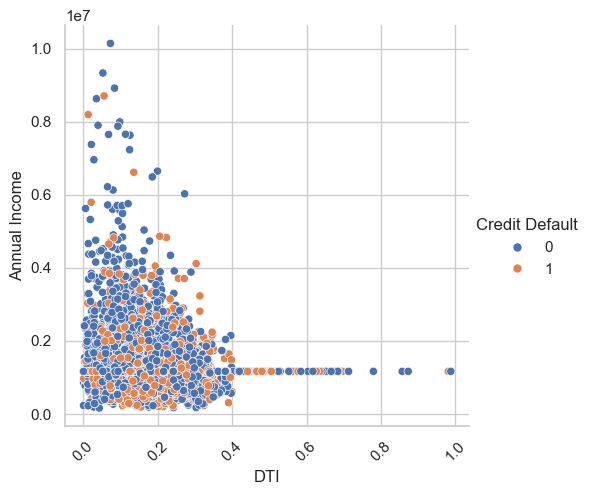

In [74]:
plt.figure(figsize=(10, 6))
# sns.barplot(x=credit_default_rates.index, y=credit_default_rates.values, palette="Blues_r")
sns.relplot(df , x = "DTI", y = "Annual Income", hue = "Credit Default")
# plt.xlabel("信用評分區間 (Credit Score)")
# plt.ylabel("違約率 (%)")
# plt.title("信用評分 vs. 違約率")
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.violinplot(x = "DTI", y = "Annual Income", hue = "Credit Default", data=df, palette="muted", split=True)
plt.title("Term & Loan Amount")
plt.xlabel("Term (0: Short Term, 1: Long Term)")
plt.ylabel("Mean Loan Amount")
# plt.legend(title="Credit Default (0: No Default, 1: Default)")
plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Annual Income", y="DTI", hue="Credit Default", alpha=0.5, palette={0: "blue", 1: "red"})
plt.xlabel("年收入 (Annual Income)")
plt.ylabel("負債收入比 (DTI)")
plt.title("Annual Income vs. DTI by Credit Default")
plt.legend(title="Credit Default", labels=["No Default (0)", "Default (1)"])
plt.show()


In [75]:
# 設定 DTI 區間
dti_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0]
dti_labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-100%"]

# 設定 Annual Income 區間
income_bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
income_labels = ["0-50K", "50K-100K", "100K-150K", "150K-200K", "200K-300K", "300K-500K", "500K-1M"]

# 分區
df["DTI Bin"] = pd.cut(df["DTI"], bins=dti_bins, labels=dti_labels)
df["Annual Income Bin"] = pd.cut(df["Annual Income"], bins=income_bins, labels=income_labels)

# 計算違約率
dti_default_rates = df.groupby("DTI Bin")["Credit Default"].mean() * 100
income_default_rates = df.groupby("Annual Income Bin")["Credit Default"].mean() * 100

print(dti_default_rates)
print(income_default_rates)

DTI Bin
0-10%      24.205202
10-20%     30.890240
20-30%     36.002149
30-40%     42.094456
40-50%     43.636364
50-60%     34.782609
60-70%     41.666667
70-100%    16.666667
Name: Credit Default, dtype: float64
Annual Income Bin
0-50K              NaN
50K-100K           NaN
100K-150K          NaN
150K-200K    28.571429
200K-300K    42.424242
300K-500K    40.659341
500K-1M      36.310223
Name: Credit Default, dtype: float64


C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\1697081743.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_default_rates = df.groupby("DTI Bin")["Credit Default"].mean() * 100
C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\1697081743.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default_rates = df.groupby("Annual Income Bin")["Credit Default"].mean() * 100


C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\3953430078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit Default", y="DTI", data=df, palette="coolwarm")
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36000 (\N{CJK UNIFIED IDEOGRAPH-8CA0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20661 (\N{CJK UNIFIED IDEOGRAPH-50B5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn0

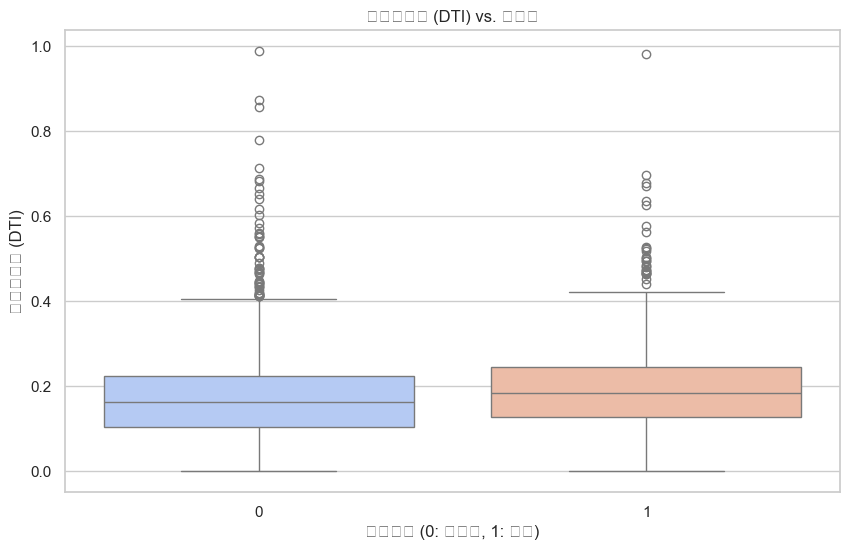

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Credit Default", y="DTI", data=df, palette="coolwarm")
plt.title("負債收入比 (DTI) vs. 違約率")
plt.xlabel("違約狀態 (0: 未違約, 1: 違約)")
plt.ylabel("負債收入比 (DTI)")
plt.show()


C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\3923801815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_default_rates.index, y=income_default_rates.values, palette="Reds_r")


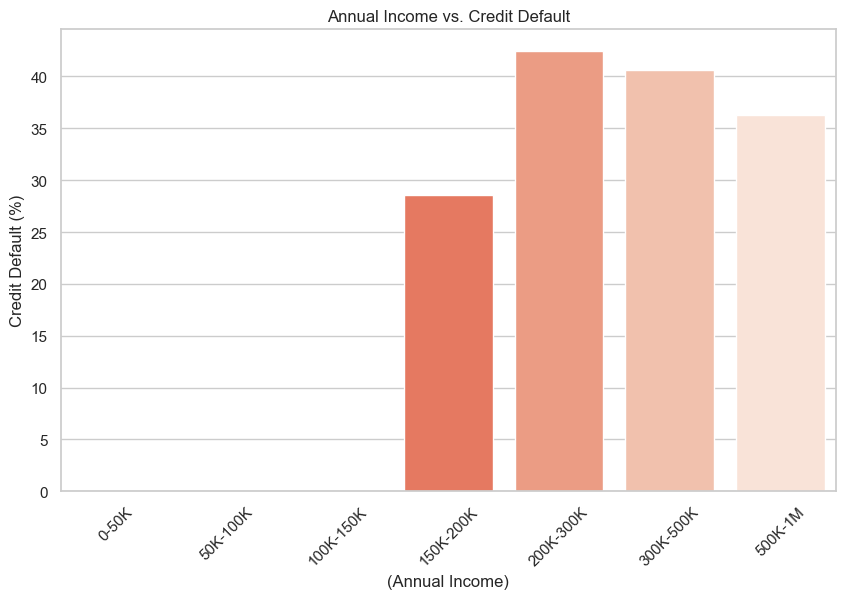

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=income_default_rates.index, y=income_default_rates.values, palette="Reds_r")
plt.xlabel("(Annual Income)")
plt.ylabel("Credit Default (%)")
plt.title("Annual Income vs. Credit Default")
plt.xticks(rotation=45)
plt.show()


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36000 (\N{CJK UNIFIED IDEOGRAPH-8CA0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20661 (\N{CJK UNIFIED IDEOGRAPH-50B5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

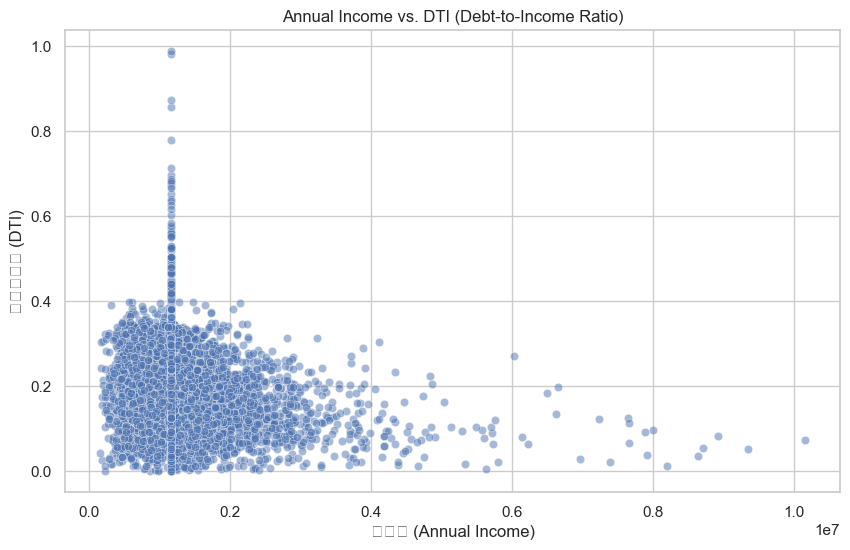

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Annual Income", y="DTI", alpha=0.5)
plt.xlabel("年收入 (Annual Income)")
plt.ylabel("負債收入比 (DTI)")
plt.title("Annual Income vs. DTI (Debt-to-Income Ratio)")
plt.show()

In [35]:
# 將類別數據化
df['Home Ownership'] = df['Home Ownership'].replace({
    'Home Mortgage': 1,
    'Rent': 2,
    'Own Home': 3,
    'Have Mortgage': 4,
}).astype(int)  # 明確轉換為整數
df['Home Ownership'].value_counts()

C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\1684714485.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Home Ownership'] = df['Home Ownership'].replace({


Home Ownership
1    3637
2    3204
3     647
4      12
Name: count, dtype: int64

In [36]:
df[["Home Ownership", "Credit Default"]].corr()

,Home Ownership,Credit Default
Home Ownership,1.000000,0.052804
Credit Default,0.052804,1.000000


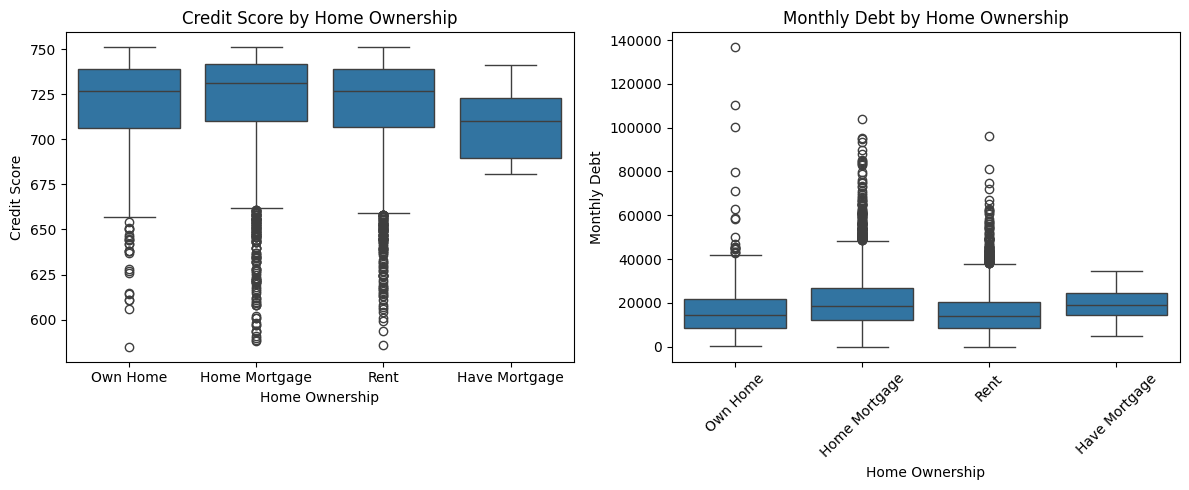

In [15]:
plt.figure(figsize=(12, 5))

# 信用評分
plt.subplot(1, 2, 1)
sns.boxplot(x="Home Ownership", y="Credit Score", data=df)
plt.title("Credit Score by Home Ownership")

# 每月負債
plt.subplot(1, 2, 2)
sns.boxplot(x="Home Ownership", y="Monthly Debt", data=df)
plt.title("Monthly Debt by Home Ownership")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
df.groupby("Home Ownership")[["Credit Score", "Monthly Debt"]].describe()

Credit Score                                               \
                      count        mean        std    min     25%    50%   
Home Ownership                                                             
Have Mortgage           8.0  708.875000  21.337007  681.0  689.75  710.0   
Home Mortgage        2897.0  721.311357  28.222094  588.0  710.00  731.0   
Own Home              513.0  717.469786  29.628685  585.0  706.00  727.0   
Rent                 2525.0  719.249505  27.251244  586.0  707.00  727.0   

                             Monthly Debt                                      \
                  75%    max        count          mean           std     min   
Home Ownership                                                                  
Have Mortgage   723.0  741.0         12.0  19351.833333   8766.402868  4789.0   
Home Mortgage   742.0  751.0       3637.0  20884.743195  12725.260351     0.0   
Own Home        739.0  751.0        647.0  16790.975270  12722.837164   284.0   
Rent            739.0  751.0       3204.0  15700.565543  10074.389818     0.0   

                                                       
                     25%      50%       75%       max  
Home Ownership                                         
Have Mortgage   14416.75  19219.0  24544.25   34357.0  
Home Mortgage   12140.00  18660.0  26708.00  104036.0  
Own Home         8627.00  14301.0  21966.50  136679.0  
Rent             8757.50  13869.0  20451.75   96177.0

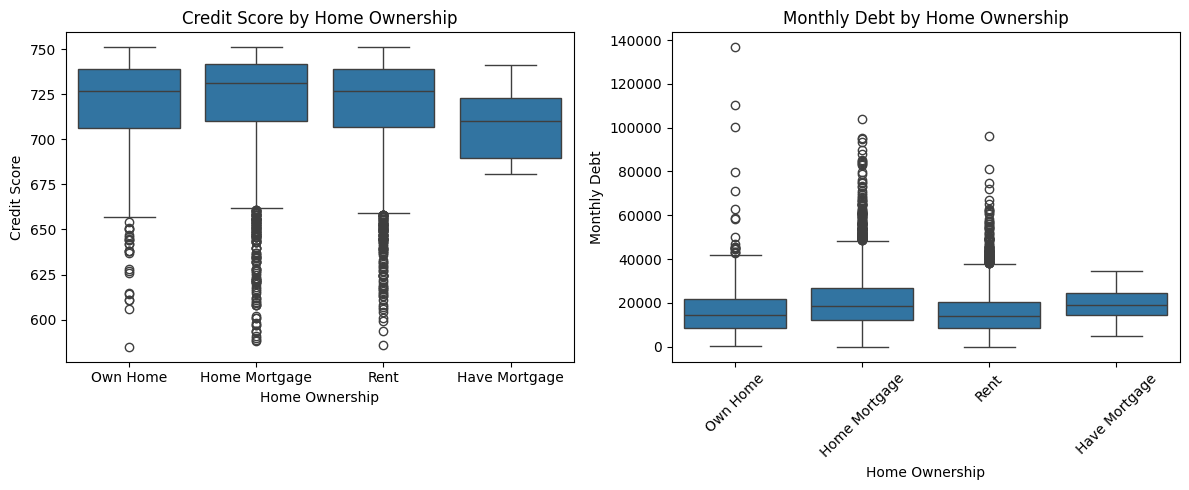

In [17]:
plt.figure(figsize=(12, 5))

# 信用評分箱型圖
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Home Ownership"], y=df["Credit Score"])
plt.title("Credit Score by Home Ownership")

# 每月負債箱型圖
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Home Ownership"], y=df["Monthly Debt"])
plt.title("Monthly Debt by Home Ownership")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
# 先將 Years in current job 數值化
job_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# 應用數值轉換
df['Years in current job'] = df['Years in current job'].map(job_mapping)
# 先檢查有多少 NaN
print(df['Years in current job'].isnull().sum())

371


In [6]:
# 補中位數
df['Years in current job'].fillna(df['Years in current job'].median())
print(df['Years in current job'].isnull().sum())

0


In [28]:
# 以眾數填補 "Bankruptcies"（因破產次數通常為 0）
df["Bankruptcies"] = df["Bankruptcies"].fillna(df["Bankruptcies"].mode()[0])

In [29]:
df["Bankruptcies"].isnull().sum()

0

In [7]:
# 數值化 Purpose（貸款用途）
purpose_mapping = {
    'debt consolidation': 1,
    'other': 2,
    'home improvements': 3,
    'business loan': 4,
    'buy a car': 5,
    'medical bills': 6,
    'major purchase': 7,
    'take a trip': 8,
    'buy house': 9,
    'small business': 10,
    'wedding': 11,
    'moving': 12,
    'educational expenses': 13,
    'vacation': 14,
    'renewable energy': 15
}

df['Purpose'] = df['Purpose'].map(purpose_mapping)

In [41]:
default_rates = df.groupby("Purpose")["Credit Default"].mean() * 100
print(default_rates.sort_values(ascending=False))


Purpose
15    100.000000
10     53.846154
4      42.635659
6      30.985915
2      29.624060
1      27.826380
8      27.027027
11     26.666667
9      26.470588
3      26.213592
5      25.000000
14     25.000000
7      22.500000
12     18.181818
13     10.000000
Name: Credit Default, dtype: float64


In [8]:
# 數值化 Term（貸款期限）
term_mapping = {
    'Short Term': 0,
    'Long Term': 1
}

df['Term'] = df['Term'].map(term_mapping)

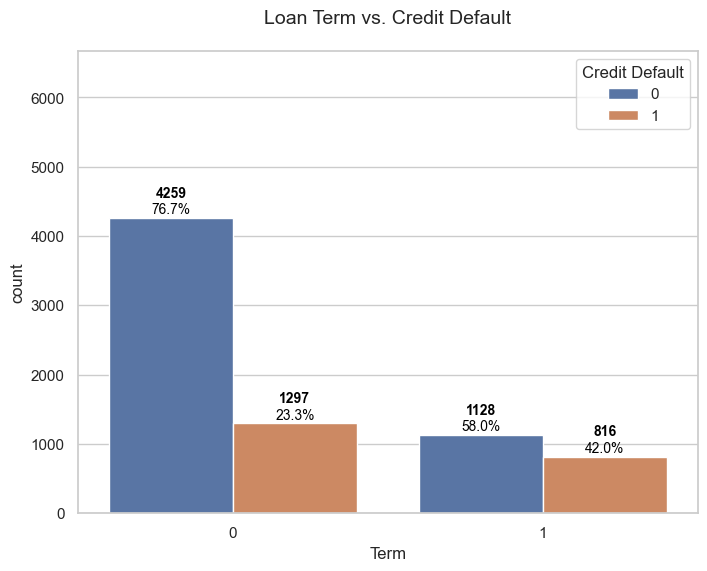

In [40]:
# 繪製分佈圖
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df, x="Term", hue="Credit Default")

# 計算每個 Term 類別內的 Credit Default 總數
grouped_totals = df.groupby("Term")["Credit Default"].count()

# 在條形圖上標註數量與正確百分比
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # 取得 X 軸的 Term 類別
        term_category = p.get_x()  # 可能是浮點數，需轉型

        # 確保正確匹配 Term 類別
        term_category = round(term_category)  # 避免浮點數問題

        # 取得該 Term 類別的總數
        total = grouped_totals.get(term_category, 1)  # 避免 KeyError

        # 計算正確的百分比
        percentage = f"{height / total * 100:.1f}%"

        # 顯示數值
        ax.annotate(f"{int(height)}", 
                    (p.get_x() + p.get_width() / 2, height + 300),  
                    ha='center', fontsize=10, color="black", fontweight="bold")

        # 顯示百分比（稍微下移）
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2, height + 60),  
                    ha='center', fontsize=10, color="black")

# 設定標題與調整佈局
plt.title("Loan Term vs. Credit Default", fontsize=14, pad=20)
plt.ylim(0, grouped_totals.max() * 1.2)  # 增加 Y 軸範圍，避免標籤擠壓

# 儲存圖片
plt.savefig("Loan_Term.png", dpi=300, bbox_inches="tight")

# 顯示圖表
plt.show()

In [ ]:
# 異常值 、缺失值、欄位物件各內容、欄位物件各數量
1. Home Ownership 房屋持有狀況，為object，無缺失值，有4個類型 'Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'

2. Annual Income 年收入，為float64，有1577個缺失值，

3. Years in current job 工作年資，為object，有371個缺失值，有11個類型 nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'

4. Tax Liens 稅收留置權，為float64，無缺值，值為0~7，絕大7366部分是0無欠，與評分、違約相關性低 (暫不參考X)

5. 

6. 

7. 

8. 

9. 

10. Current Loan Amount目前貸款金額有99999999.0 的異常值

11. Credit Score 值有問題被區分為1000以下與1000以上，1000以上大概都在6000~7500左右，改完與違約值有關 (加入參考依據)

In [9]:
df.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [45]:
print(df.groupby("Credit Default")["Current Loan Amount"].describe())
correlation = df[["Current Loan Amount", "Credit Default"]].corr()
print(correlation)
print(df[df["Current Loan Amount"] == 99999999])


                 count          mean           std      min       25%  \
Credit Default                                                          
0               5387.0  1.640219e+07  3.669223e+07  11242.0  179806.0   
1               2113.0  3.266510e+05  1.860271e+05  21472.0  181610.0   

                     50%       75%         max  
Credit Default                                  
0               314534.0  551078.0  99999999.0  
1               290576.0  444708.0    788634.0  
                     Current Loan Amount  Credit Default
Current Loan Amount             1.000000       -0.226522
Credit Default                 -0.226522        1.000000
        Id  Home Ownership  Annual Income  Years in current job  Tax Liens  \
0        0               3       482087.0                   6.0        0.0   
2        2               1       751412.0                   8.0        0.0   
6        6               1      1511108.0                  10.0        0.0   
22      22               2  

In [43]:
df["Current Loan Amount"].value_counts()

Current Loan Amount
99999999.0    870
218064.0        6
89298.0         6
222926.0        5
265826.0        5
             ... 
351626.0        1
212498.0        1
187682.0        1
108922.0        1
26928.0         1
Name: count, Length: 5386, dtype: int64

In [46]:
print(df[df["Current Loan Amount"] == 99999999]["Credit Default"].value_counts())

Credit Default
0    870
Name: count, dtype: int64


In [47]:
# 移除 
df = df[df["Current Loan Amount"] != 99999999]


In [48]:
df.groupby("Credit Default")["Current Loan Amount"].describe()


,count,mean,std,min,25%,50%,75%,max
Credit Default,,,,,,,,
0,4517.0,300778.847022,179950.143176,11242.0,164076.0,262482.0,408562.0,789030.0
1,2113.0,326651.044013,186027.080635,21472.0,181610.0,290576.0,444708.0,788634.0


C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\2525067975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit Default", y="Current Loan Amount", data=df, palette="coolwarm")


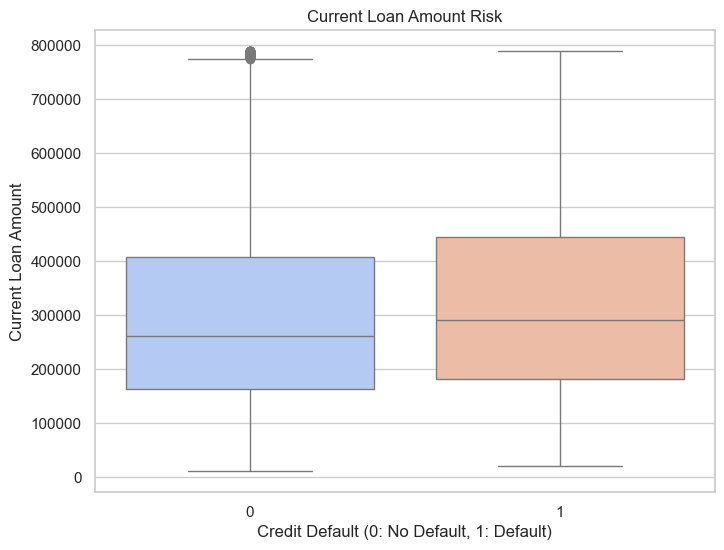

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Credit Default", y="Current Loan Amount", data=df, palette="coolwarm")
plt.title("Current Loan Amount Risk")
plt.xlabel("Credit Default (0: No Default, 1: Default)")
plt.ylabel("Current Loan Amount")
plt.show()

In [66]:
# # 定義貸款金額區間
# bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000]
# labels = ["0-100K", "100K-200K", "200K-300K", "300K-400K", "400K-500K", "500K-600K", "600K-700K", "700K-800K"]

# # 新增 'Loan Amount Bin' 欄位，將貸款金額分區
# df["Loan Amount Bin"] = pd.cut(df["Current Loan Amount"], bins=bins, labels=labels)

# # 計算各貸款金額區間內的違約率
# loan_default_rates = df.groupby("Loan Amount Bin")["Credit Default"].mean() * 100

# # 顯示結果
# print(loan_default_rates)

In [57]:
df.groupby(["Term", "Credit Default"])["Current Loan Amount"].describe()


count           mean            std      min       25%  \
Term Credit Default                                                            
0    0               3533.0  262486.097368  163025.557434  11242.0  141152.0   
     1               1297.0  256058.152660  161072.231164  21472.0  137676.0   
1    0                984.0  438266.941057  170527.066507  43846.0  314187.5   
     1                816.0  438855.676471  166992.558130  38720.0  312224.0   

                          50%       75%       max  
Term Credit Default                                
0    0               221518.0  336732.0  788634.0  
     1               218636.0  330792.0  788634.0  
1    0               423577.0  550495.0  789030.0  
     1               431222.0  545693.5  787644.0

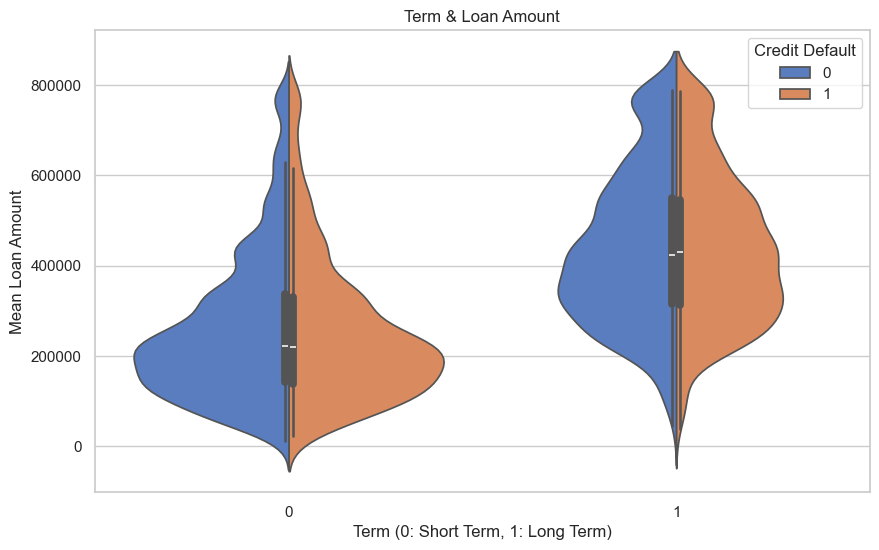

In [63]:
plt.figure(figsize=(10, 6))
# sns.barplot(x="Term", y="Current Loan Amount", hue="Credit Default", data=df, palette="Blues_r", ci=None)
# sns.boxplot(x="Term", y="Current Loan Amount", hue="Credit Default", data=df, palette="coolwarm")
sns.violinplot(x="Term", y="Current Loan Amount", hue="Credit Default", data=df, palette="muted", split=True)
plt.title("Term & Loan Amount")
plt.xlabel("Term (0: Short Term, 1: Long Term)")
plt.ylabel("Mean Loan Amount")
# plt.legend(title="Credit Default (0: No Default, 1: Default)")
plt.show()

In [64]:
import scipy.stats as stats
contingency_table = pd.crosstab(df["Term"], df["Credit Default"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"貸款期限 vs. 違約率 卡方檢定: p-value = {p}")


貸款期限 vs. 違約率 卡方檢定: p-value = 1.3823347378702684e-46


In [10]:
# 距離上次違約的月數
# 距離上次違約的月數(數值越高就是離未繳期間將對久，代表改善，nan代表沒有違約過): 
print("獨特值:", df["Months since last delinquent"].unique(),df["Months since last delinquent"].nunique())

# 看一下均值 
print(df["Months since last delinquent"].describe())
print(df["Months since last delinquent"].value_counts())

獨特值: [ nan  73.  18.   6.  40.  44.  45.  17.  61.  14.  11.  32.  75.  65.
  10.  28.  35.  29.  13.   8.  71.  54.  21.  68.  51.  70.  19.  22.
  16.  38.  36.   0.  34.  30.   3.  52.  72.  63.  23.   5.  60.  59.
   1.  74.   4.  42.  39.  41.  55.  67.  37.  47.  26.  76.  43.  12.
   7.  77.  48.  79.  80.  31.  64.  78.  20.  58.  49.   9.  69.  25.
  33.  15.  57.  86.  62.   2.  24.  56.  82.  66.  46.  27.  50.  53.
  81.  83. 118.  84.  91.  92.] 89
count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64
Months since last delinquent
14.0     76
29.0     71
33.0     68
8.0      68
12.0     65
         ..
86.0      1
118.0     1
84.0      1
91.0      1
92.0      1
Name: count, Length: 89, dtype: int64


In [54]:
correlation = df[["Current Loan Amount", "Credit Default"]].corr()
print(correlation)
print(df["Current Loan Amount"])
print(df.info())

                     Current Loan Amount  Credit Default
Current Loan Amount             1.000000        0.066139
Credit Default                  0.066139        1.000000
1       264968.0
3       121396.0
4       125840.0
5       337304.0
7       250888.0
          ...   
7494    290400.0
7495    129360.0
7496    444048.0
7498    615274.0
7499     26928.0
Name: Current Loan Amount, Length: 6630, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 6630 entries, 1 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            6630 non-null   int64  
 1   Home Ownership                6630 non-null   int32  
 2   Annual Income                 6630 non-null   float64
 3   Years in current job          6630 non-null   float64
 4   Tax Liens                     6630 non-null   float64
 5   Number of Open Accounts       6630 non-null   float64
 6   Years o

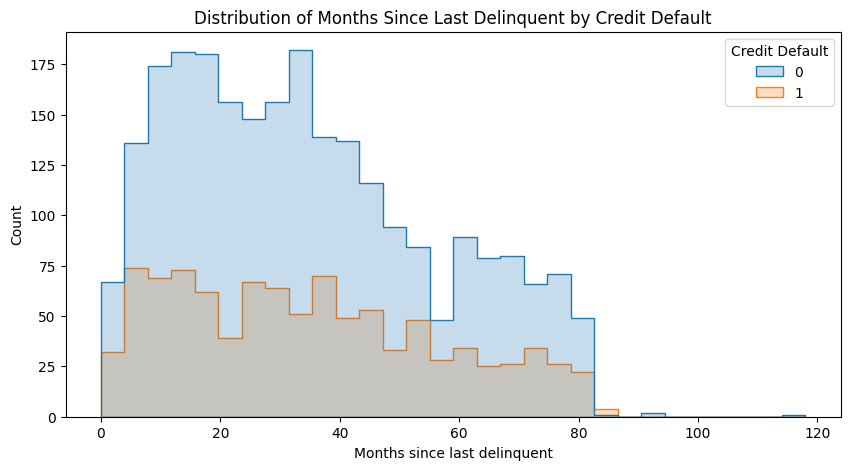

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Months since last delinquent", hue="Credit Default", bins=30, element="step")
plt.title("Distribution of Months Since Last Delinquent by Credit Default")
plt.show()
# 透過下圖，會發現，從未逾期繳貸款的人，其實違約率也是蠻高的
# 我想計算，繳款預期預期0~50個月、50~100月、999(未逾期繳費人)違約比率

In [ ]:
# 將 nan未違約改為 -1，將缺值補足
df["Months since last delinquent"] = df["Months since last delinquent"].fillna(-1)
print(df["Months since last delinquent"].isnull().sum())

In [14]:
# 修改 'Credit Score'內容，將大於1000的都除10
df.loc[df['Credit Score'] > 1000, 'Credit Score'] /= 10
print(df['Credit Score'].describe())

count    5943.000000
mean      720.086993
std        27.957233
min       585.000000
25%       708.000000
50%       729.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64


In [20]:
df.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

<Axes: xlabel='Credit Default', ylabel='Credit Score'>

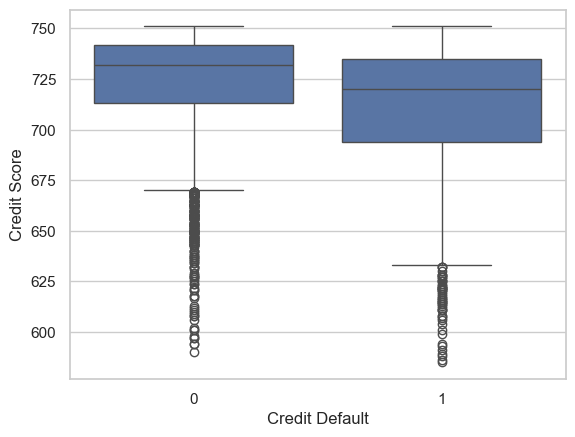

In [23]:
sns.boxplot(x="Credit Default", y="Credit Score", data=df)

In [30]:
# 以相近群體的中位數填補 Credit Score（按 Home Ownership 分組）
df["Credit Score"] = df.groupby("Home Ownership")["Credit Score"].transform(lambda x: x.fillna(x.median()))

# 確保填補完成
print(df.isnull().sum())


Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                       0
Credit Default                     0
dtype: int64


In [32]:
print(df.isnull().sum())

Id                                 0
Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                       0
Credit Default                     0
dtype: int64


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   int32  
 2   Annual Income                 7500 non-null   float64
 3   Years in current job          7500 non-null   float64
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7500 non-null   float64
 11  Purpose                       7500 non-null   int64  
 12  Term                          7500 non-null   int64  
 13  Cur

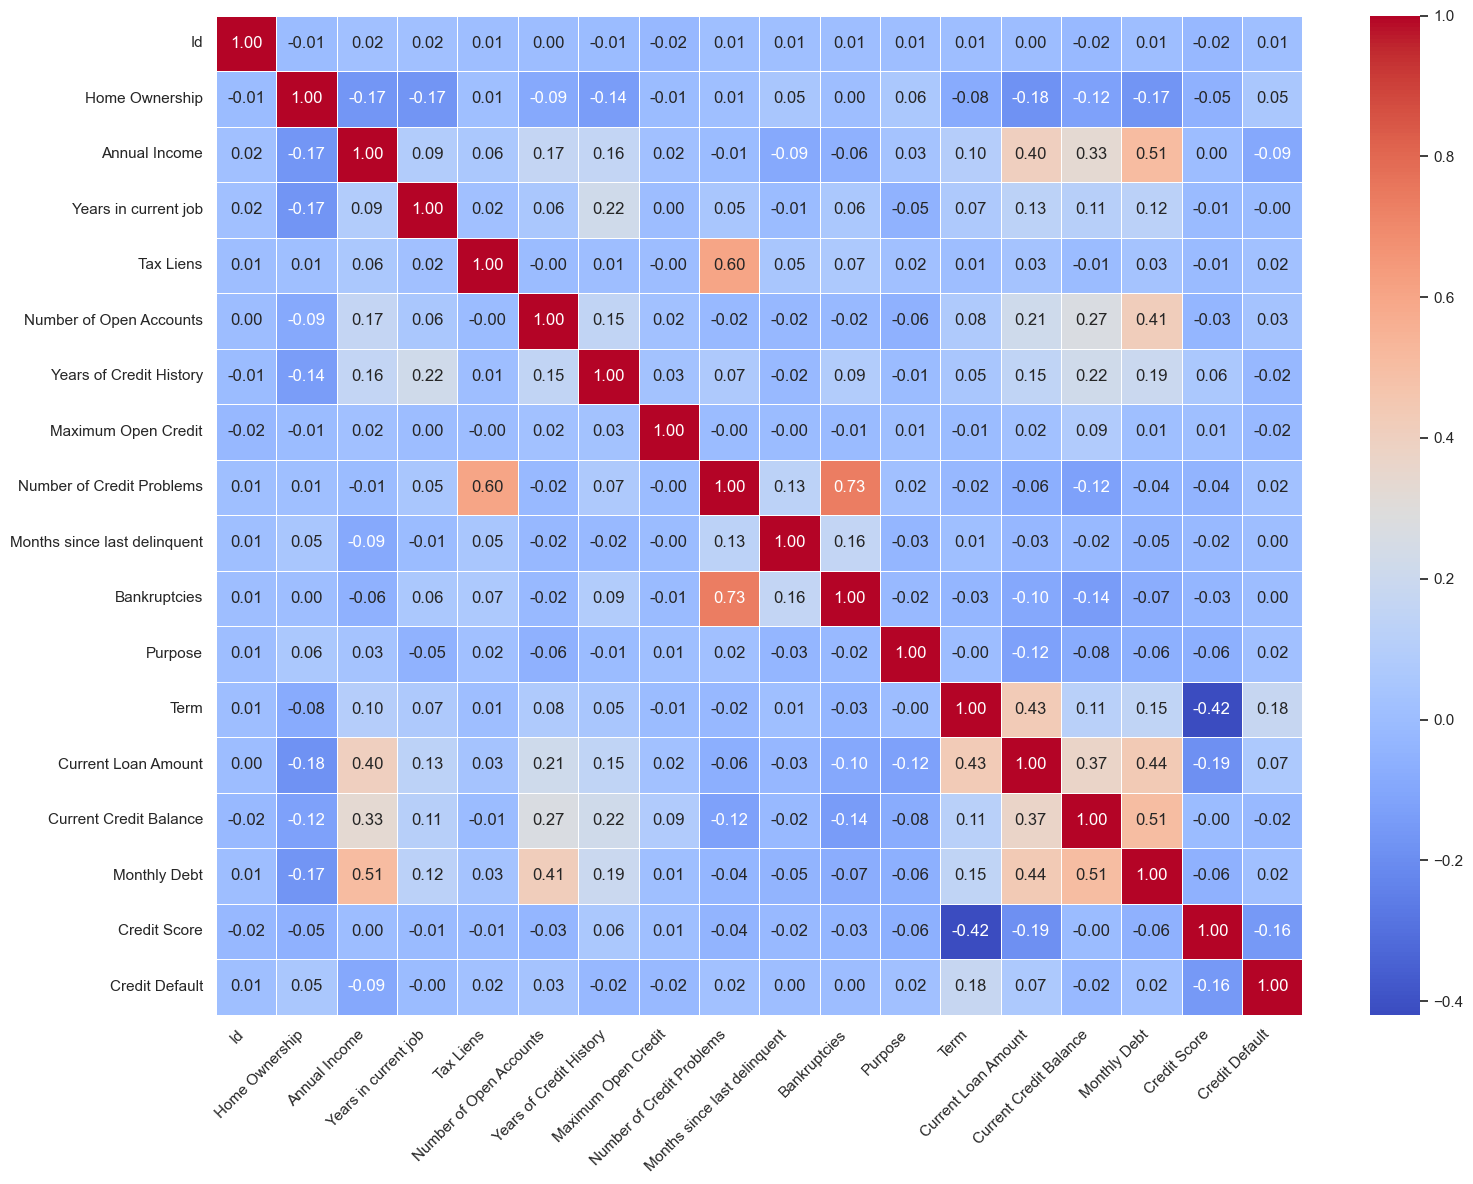

In [55]:
# 設定圖表大小
plt.figure(figsize=(16, 12))

# 繪製熱圖
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 旋轉 X 軸標籤，確保不重疊
plt.xticks(rotation=45, ha="right")

# 確保圖表不會被裁剪
plt.tight_layout()

# 儲存圖片
plt.savefig("heatmap_new.png", dpi=300)

# 顯示圖片
plt.show()

In [80]:
# 設定 DTI 區間
dti_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0]
dti_labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-100%"]

# 分區
df["DTI Bin"] = pd.cut(df["DTI"], bins=dti_bins, labels=dti_labels)

# 計算違約率
dti_default_rates = df.groupby("DTI Bin")["Credit Default"].mean() * 100

# 顯示結果
print(dti_default_rates)

DTI Bin
0-10%      24.205202
10-20%     30.890240
20-30%     36.002149
30-40%     42.094456
40-50%     43.636364
50-60%     34.782609
60-70%     41.666667
70-100%    16.666667
Name: Credit Default, dtype: float64


C:\Users\gn012\AppData\Local\Temp\ipykernel_33860\3295085654.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_default_rates = df.groupby("DTI Bin")["Credit Default"].mean() * 100


In [ ]:
# 以下未執行

In [ ]:
# 數值化 Home Ownership
df['Home Ownership'] = df['Home Ownership'].map({'Rent': 0, 'Own Home': 1, 'Home Mortgage': 2})

# 計算 Debt-to-Income Ratio (DTI)
df['DTI'] = df['Monthly Debt'] / (df['Annual Income'] / 12)

# 計算 Credit Utilization Ratio
df['Credit Utilization'] = df['Current Credit Balance'] / df['Maximum Open Credit']

# 檢查數據是否成功轉換
print(df[['Home Ownership', 'DTI', 'Credit Utilization']].head())

In [ ]:
df[['Home Ownership', 'DTI', 'Credit Utilization', "Credit Score", "Credit Default"]].corr()